In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/epa-sea-level.csv")
print(df.head())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


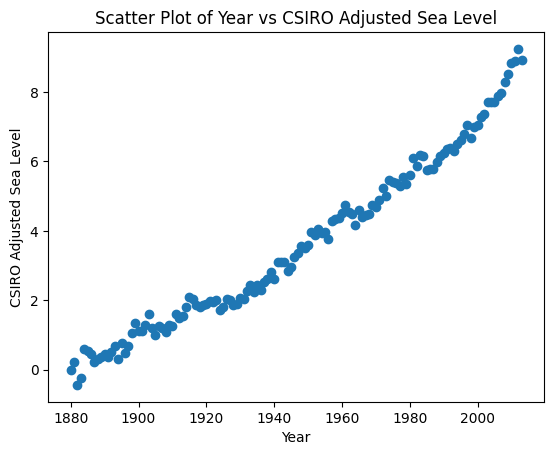

In [3]:
#Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Scatter Plot of Year vs CSIRO Adjusted Sea Level')
plt.show()

LinregressResult(slope=np.float64(nan), intercept=np.float64(nan), rvalue=np.float64(nan), pvalue=np.float64(nan), stderr=np.float64(nan), intercept_stderr=np.float64(nan))
0      1850
1      1851
2      1852
3      1853
4      1854
       ... 
196    2046
197    2047
198    2048
199    2049
200    2050
Length: 201, dtype: int64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
196   NaN
197   NaN
198   NaN
199   NaN
200   NaN
Length: 201, dtype: float64


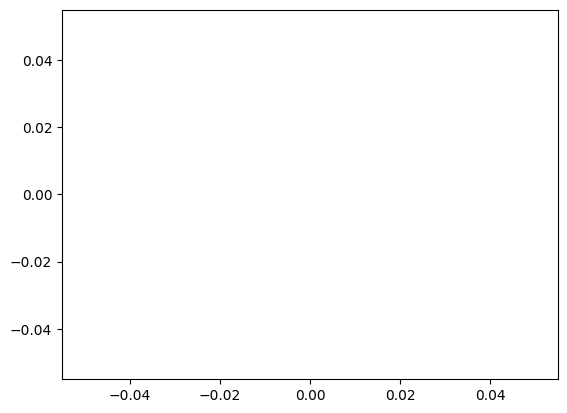

In [5]:
#Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
from scipy.stats import linregress
res = linregress(x,y)
print(res)
x_forcast= pd.Series(([i for i in range(1850, 2051)]))
print(x_forcast)
y_forcast = res.slope*x_forcast + res.intercept
print(y_forcast)
plt.plot(x_forcast, y_forcast, 'r-')
df_forc = df.loc[df["Year"] >= 2000]
new_x = df_forc["Year"]
new_y = df_forc["CSIRO Adjusted Sea Level"]

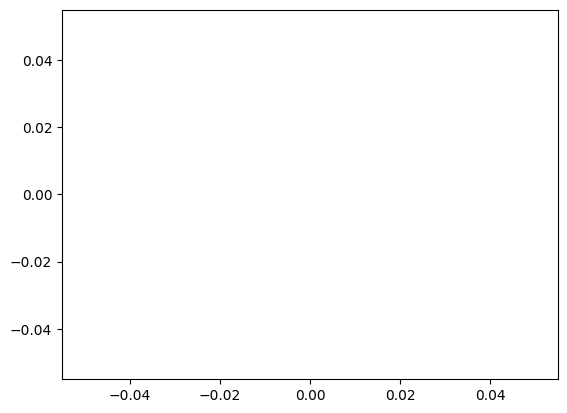

In [6]:
#Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
new_res = linregress(new_x, new_y)
new_x_forcast= pd.Series(([i for i in range(2000, 2051)]))
new_y_forcast = new_res.slope*new_x_forcast + new_res.intercept
plt.plot(new_x_forcast, new_y_forcast, 'orange')